In [94]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

base_dir = Path("/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official")


experiment_mapping = {
    "multi_run_2025-05-02_00-31-21": "CP-A",  
    "multi_run_2025-05-04_00-51-30": "CoT",     
    "multi_run_2025-05-06_22-14-46": "LtM"        
}

multi_run_dirs = [d for d in base_dir.glob("multi_run_*") if d.is_dir()]
print(f"Found {len(multi_run_dirs)} multi-run directories: {[d.name for d in multi_run_dirs]}")

all_runs = []

for dir_path in multi_run_dirs:
    json_path = dir_path / "all_runs_data.json"
    
    experiment_name = experiment_mapping.get(dir_path.name, dir_path.name)
    
    if json_path.exists():
        try:
            with open(json_path, 'r') as f:
                runs_data = json.load(f)
                
                for run in runs_data:
                    run["experiment_name"] = experiment_name
                    run["source_dir"] = dir_path.name
                    all_runs.append(run)
                    
            print(f"Loaded {len(runs_data)} runs from {dir_path.name}")
        except Exception as e:
            print(f"Error loading {json_path}: {e}")
    else:
        print(f"File not found: {json_path}")

df = pd.DataFrame(all_runs)

print(f"Total runs loaded: {len(df)}")
print(f"Experiments: {df['experiment_name'].unique()}")
print(f"Available metrics: {df.columns.tolist()}")


Found 6 multi-run directories: ['multi_run_2025-05-11_00-21-16', 'multi_run_2025-05-04_00-51-30', 'multi_run_2025-05-10_18-05-54', 'multi_run_2025-05-06_22-14-46', 'multi_run_2025-05-10_14-26-00', 'multi_run_2025-05-02_00-31-21']
File not found: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/all_runs_data.json
Loaded 10 runs from multi_run_2025-05-04_00-51-30
File not found: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-10_18-05-54/all_runs_data.json
Loaded 10 runs from multi_run_2025-05-06_22-14-46
File not found: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-10_14-26-00/all_runs_data.json
Loaded 10 runs from multi_run_2025-05-02_00-31-21
Total runs loaded: 30
Experiments: ['CoT' 'LtM' 'CP-A']
Available metrics: ['SP-BLEU', 'METEOR'

In [95]:
df.head()

,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,empty_results_count,syntactically_valid_queries_count,avg_result_including_empty_result_precision,avg_result_including_empty_result_recall,avg_result_including_empty_result_f1,...,avg_result_excluding_empty_result_f1,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all,experiment_name,source_dir
0,0.094054,0.286233,1,30,7,11,22,0.066667,0.066667,0.066667,...,0.250000,4,"[SwissLipids/6.ttl, UniProt/51_all_proteins_li...",0.034483,0.034483,0.034483,29,[],CoT,multi_run_2025-05-04_00-51-30
1,0.104572,0.303081,3,30,5,10,19,0.071429,0.071429,0.071429,...,0.250000,4,"[SwissLipids/6.ttl, UniProt/51_all_proteins_li...",0.034483,0.034483,0.034483,29,[],CoT,multi_run_2025-05-04_00-51-30
2,0.097871,0.297401,3,29,6,11,21,0.000000,0.000000,0.000000,...,0.000000,3,[UniProt/51_all_proteins_linked_to_arachidonat...,0.000000,0.000000,0.000000,28,[],CoT,multi_run_2025-05-04_00-51-30
3,0.101009,0.294727,2,29,3,12,22,0.111111,0.111111,0.111111,...,0.333333,6,"[SwissLipids/6.ttl, UniProt/51_all_proteins_li...",0.071429,0.071429,0.071429,28,[],CoT,multi_run_2025-05-04_00-51-30
4,0.100835,0.301400,3,30,5,13,21,0.000000,0.000000,0.000000,...,0.000000,3,[UniProt/51_all_proteins_linked_to_arachidonat...,0.000000,0.000000,0.000000,29,[],CoT,multi_run_2025-05-04_00-51-30


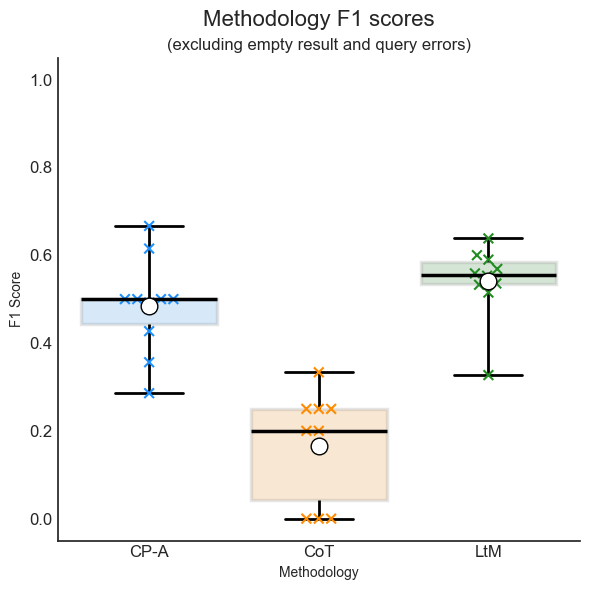

In [96]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(6, 6))

plot_palette = {
    "CP-A": "dodgerblue",
    "CoT": "darkorange",
    "LtM": "forestgreen"
}

experiment_order = ["CP-A", "CoT", "LtM"]
metric = "avg_result_excluding_empty_result_f1"
#metric = "avg_result_all_f1"
#metric = "avg_result_including_empty_result_f1"


bp = sns.boxplot(x="experiment_name", y=metric, hue="experiment_name", data=df, ax=ax,
            order=experiment_order,
            hue_order=experiment_order,
            palette=plot_palette,  # Use the same palette as for crosses
            medianprops={"color": "black", "linewidth": 2.5},
            whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},
            boxprops={"alpha": 0.2, "edgecolor": "gray", "linewidth": 2.5},
            showfliers=False,
            whis=[0, 100],
            legend=False)


sns.swarmplot(x="experiment_name", y=metric, hue="experiment_name", data=df, ax=ax,
              order=experiment_order,
              hue_order=experiment_order,
              palette=plot_palette,
              size=7,
              marker='x',
              linewidth=1.5,
              zorder=2,
              legend=False)

for experiment_idx, experiment_name_val in enumerate(experiment_order):
    experiment_data = df[df["experiment_name"] == experiment_name_val]
    if not experiment_data.empty:
        mean_value = experiment_data[metric].mean()
        ax.plot(experiment_idx, mean_value, 'o',
                markerfacecolor='white',
                markeredgecolor='black',
                markersize=12,
                markeredgewidth=1,
                zorder=3)

ax.set_xlabel("Methodology")
ax.set_ylabel("F1 Score")
ax.set_title("Methodology F1 scores\n", fontsize=16)
ax.text(0.5, 1.01, "(excluding empty result and query errors)", 
        transform=ax.transAxes, fontsize=12, ha='center', va='bottom')
ax.set_ylim(-0.05, 1.05)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine(ax=ax)

plt.tight_layout()
plt.savefig("model_comparison_f1_scores.png", dpi=300, bbox_inches='tight')
plt.show()

summary = df.groupby('experiment_name')[[metric]].agg(['mean', 'std', 'min', 'max'])
if not summary.empty and all(exp in summary.index for exp in experiment_order):
    summary = summary.reindex(experiment_order)

In [97]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

base_dir = Path("/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official")

experiment_mapping = {
    "multi_run_2025-05-02_00-31-21": "CP-A",  
    "multi_run_2025-05-04_00-51-30": "CoT",     
    "multi_run_2025-05-06_22-14-46": "LtM"        
}

multi_run_dirs = [d for d in base_dir.glob("multi_run_*") if d.is_dir()]
print(f"Found {len(multi_run_dirs)} multi-run directories: {[d.name for d in multi_run_dirs]}")

stats_data_list = []

for dir_path in multi_run_dirs:
    stats_path = dir_path / "aggregate_statistics.json"
    
    # Get experiment name from mapping
    experiment_name = experiment_mapping.get(dir_path.name, dir_path.name)
    
    if stats_path.exists():
        try:
            with open(stats_path, 'r') as f:
                stats_data = json.load(f)
                stats_data["experiment_name"] = experiment_name
                stats_data["source_dir"] = dir_path.name
                stats_data_list.append(stats_data)
        except Exception as e:
            print(f"Error loading {stats_path}: {e}")
    else:
        print(f"File not found: {stats_path}")

df_aggregated_stats = pd.DataFrame(stats_data_list)

Found 6 multi-run directories: ['multi_run_2025-05-11_00-21-16', 'multi_run_2025-05-04_00-51-30', 'multi_run_2025-05-10_18-05-54', 'multi_run_2025-05-06_22-14-46', 'multi_run_2025-05-10_14-26-00', 'multi_run_2025-05-02_00-31-21']
File not found: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/aggregate_statistics.json
File not found: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-10_18-05-54/aggregate_statistics.json
File not found: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-10_14-26-00/aggregate_statistics.json


In [98]:
df_aggregated_stats.head()

,avg_result_excluding_empty_result_precision,avg_result_excluding_empty_result_recall,avg_result_excluding_empty_result_f1,avg_result_including_empty_result_precision,avg_result_including_empty_result_recall,avg_result_including_empty_result_f1,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,experiment_name,source_dir,c
0,"{'mean': 0.165, 'ci_lower': 0.0776669009099405...","{'mean': 0.165, 'ci_lower': 0.0776669009099405...","{'mean': 0.165, 'ci_lower': 0.0776669009099405...","{'mean': 0.0477328124232149, 'ci_lower': 0.021...","{'mean': 0.0477328124232149, 'ci_lower': 0.021...","{'mean': 0.0477328124232149, 'ci_lower': 0.021...","{'mean': 0.027955665024630538, 'ci_lower': 0.0...","{'mean': 0.027955665024630538, 'ci_lower': 0.0...","{'mean': 0.027955665024630538, 'ci_lower': 0.0...",CoT,multi_run_2025-05-04_00-51-30,NaN
1,"{'mean': 0.5191746861713676, 'ci_lower': 0.458...","{'mean': 0.6265319430704501, 'ci_lower': 0.545...","{'mean': 0.5418751785708819, 'ci_lower': 0.481...","{'mean': 0.2558737423137969, 'ci_lower': 0.224...","{'mean': 0.3108166161987837, 'ci_lower': 0.261...","{'mean': 0.26775641749938817, 'ci_lower': 0.23...","{'mean': 0.11505018107822221, 'ci_lower': 0.09...","{'mean': 0.1406219378848404, 'ci_lower': 0.113...",NaN,LtM,multi_run_2025-05-06_22-14-46,"{'mean': 0.12055369426253922, 'ci_lower': 0.10..."
2,"{'mean': 0.48564311582204356, 'ci_lower': 0.40...","{'mean': 0.5039065565016477, 'ci_lower': 0.414...","{'mean': 0.4842727705899038, 'ci_lower': 0.404...","{'mean': 0.16627796179348694, 'ci_lower': 0.12...","{'mean': 0.1735580393735114, 'ci_lower': 0.125...","{'mean': 0.16531860598591724, 'ci_lower': 0.12...","{'mean': 0.07653528849154187, 'ci_lower': 0.05...","{'mean': 0.0796962300375251, 'ci_lower': 0.059...","{'mean': 0.07603692225120603, 'ci_lower': 0.05...",CP-A,multi_run_2025-05-02_00-31-21,NaN


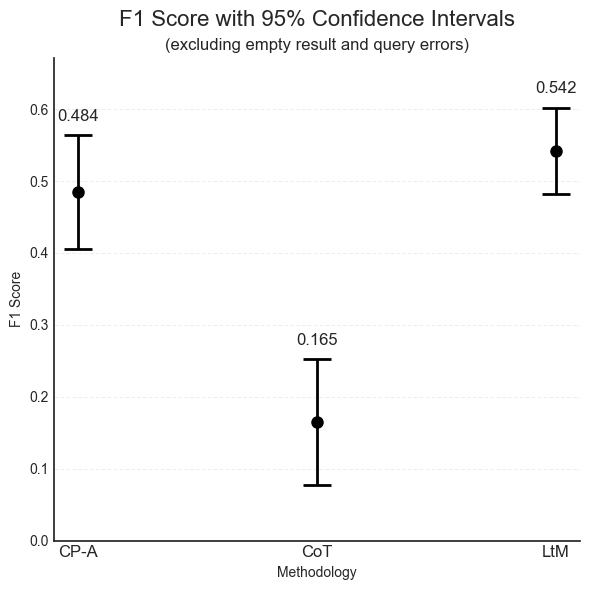

In [99]:
import matplotlib.pyplot as plt
import numpy as np

experiment_order = ["CP-A", "CoT", "LtM"]
colors = {
    "CP-A": "dodgerblue",
    "CoT": "darkorange",
    "LtM": "forestgreen"
}

f1_means = []
errors_minus = []
errors_plus = []

for experiment in experiment_order:
    exp_row = df_aggregated_stats[df_aggregated_stats['experiment_name'] == experiment].iloc[0]
    metric_data = exp_row['avg_result_excluding_empty_result_f1']
    
    mean = metric_data['mean']
    lower = metric_data['ci_lower']
    upper = metric_data['ci_upper']
    
    f1_means.append(mean)
    errors_minus.append(mean - lower)
    errors_plus.append(upper - mean)

fig, ax = plt.subplots(figsize=(6, 6))
x_pos = np.arange(len(experiment_order))

# Create separate errorbar for each experiment with its specific color
for i, exp in enumerate(experiment_order):
    ax.errorbar(x_pos[i], f1_means[i], 
                yerr=[[errors_minus[i]], [errors_plus[i]]],
                fmt='o', 
                markersize=8,
                capsize=10,
                ecolor='black',
                elinewidth=2,
                capthick=2,
                color='black')

for i, mean in enumerate(f1_means):
    ax.text(x_pos[i], mean + errors_plus[i] + 0.02,
             f'{mean:.3f}',
             ha='center', fontsize=12)

ax.set_ylabel('F1 Score')
ax.set_xlabel('Methodology')
ax.set_title("F1 Score with 95% Confidence Intervals\n", fontsize=16)
ax.text(0.5, 1.01, "(excluding empty result and query errors)", 
        transform=ax.transAxes, fontsize=12, ha='center', va='bottom')

ax.set_xticks(x_pos)
ax.set_xticklabels(experiment_order, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylim(0, max([mean + err + 0.07 for mean, err in zip(f1_means, errors_plus)]))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('f1_scores_errorbar.png', dpi=300)
plt.show()

## Experiments

- Baseline. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10
- CP. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29
- CP + CoT. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/run_1/ev_2025-05-11_00-21-16
- CoT few shot. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-04_00-51-30/run_2/ev_2025-05-04_01-51-29
- CP-E. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/run_2/ev_2025-05-02_02-09-02
- LtM. -> /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46/run_2/ev_2025-05-07_09-53-08

In [ ]:
import pandas as pd
import numpy as np


evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/evaluation_dataset.json"
df_eval_1 = pd.read_json(evaluation_dataset_path_1)
df_eval_1["experiment_name"] = "Baseline"
df_eval_1["evaluation_timestamp"] = "ev_2025-05-08_18-12-10"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29/evaluation_dataset.json"
df_eval_2 = pd.read_json(evaluation_dataset_path_2)
df_eval_2["experiment_name"] = "CP"
df_eval_2["evaluation_timestamp"] = "ev_2025-04-25_17-49-29"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/run_1/ev_2025-05-11_00-21-16/evaluation_dataset.json"
df_eval_3 = pd.read_json(evaluation_dataset_path_3)
df_eval_3["experiment_name"] = "CoT"
df_eval_3["evaluation_timestamp"] = "ev_2025-05-11_00-21-16"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-04_00-51-30/run_2/ev_2025-05-04_01-51-29/evaluation_dataset.json"
df_eval_4 = pd.read_json(evaluation_dataset_path_4)
df_eval_4["experiment_name"] = "CoT few shot"
df_eval_4["evaluation_timestamp"] = "ev_2025-05-04_01-51-29"

evaluation_dataset_path_5 = "/Users/sebastian/Doccuments/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/run_2/ev_2025-05-02_02-09-02/evaluation_dataset.json"
df_eval_5 = pd.read_json(evaluation_dataset_path_5)
df_eval_5["experiment_name"] = "CP-E"
df_eval_5["evaluation_timestamp"] = "ev_2025-05-02_02-09-02"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46/run_4/ev_2025-05-07_09-53-08/evaluation_dataset.json"
df_eval_6 = pd.read_json(evaluation_dataset_path_6)
df_eval_6["experiment_name"] = "LtM"
df_eval_6["evaluation_timestamp"] = "ev_2025-05-07_09-53-08"


df = pd.concat([df_eval_1, df_eval_2, df_eval_3, df_eval_4, df_eval_5, df_eval_6])

In [101]:
df.head()

,resource,natural_language_question,ground_truth_query,target_endpoint,federates_with,endpoint_set,file_path,predicted_query,predicted_endpoint,predicted_endpoint_equal_to_target_endpoint,...,experiment_name,planning_prompt_tokens,planning_completion_tokens,planning_total_tokens,pattern_prompt_tokens,pattern_completion_tokens,pattern_total_tokens,assembler_prompt_tokens,assembler_completion_tokens,assembler_total_tokens
0,https://sparql.swisslipids.org/.well-known/spa...,"For a given lipid (SWISSLIPID:000399814, Ceram...",PREFIX SWISSLIPID: <https://swisslipids.org/rd...,https://sparql.swisslipids.org/sparql/,"[https://sparql.uniprot.org/sparql, https://sp...",SwissLipids,SwissLipids/16.ttl,# https://sparql.uniprot.org/sparql\nSELECT DI...,https://sparql.uniprot.org/sparql,False,...,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://sparql.swisslipids.org/.well-known/spa...,"For a given lipid (SWISSLIPID:000399814, Ceram...",PREFIX SWISSLIPID: <https://swisslipids.org/rd...,https://sparql.swisslipids.org/sparql/,"[https://sparql.uniprot.org/sparql, https://sp...",SwissLipids,SwissLipids/6.ttl,# https://sparql.swissbioportal.org/sparql\nSE...,https://sparql.swissbioportal.org/sparql,False,...,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://sparql.swisslipids.org/.well-known/spa...,"For a given lipid (SWISSLIPID:000399814, Ceram...",PREFIX SWISSLIPID: <https://swisslipids.org/rd...,https://sparql.swisslipids.org/sparql/,[https://sparql.rhea-db.org/sparql],SwissLipids,SwissLipids/5.ttl,# https://sparql.swissbiopics.org/\n\nSELECT D...,https://sparql.swissbiopics.org/,False,...,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://sparql.swisslipids.org/.well-known/spa...,Lipids affected by human enzymes,PREFIX owl: <http://www.w3.org/2002/07/owl#>\n...,https://sparql.swisslipids.org/sparql/,"[https://sparql.uniprot.org/sparql, https://sp...",SwissLipids,SwissLipids/34.ttl,# https://sparql.swissbioportal.org/sparql\nSE...,https://sparql.swissbioportal.org/sparql,False,...,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://sparql.uniprot.org/.well-known/sparql-...,What are the Homo sapiens genes associated wit...,PREFIX up:<http://purl.uniprot.org/core/>\nPRE...,https://sparql.uniprot.org/sparql,"[https://sparql.omabrowser.org/sparql/, https:...",Uniprot,UniProt/118_biosodafrontend_rat_brain_human_ca...,# Endpoint: https://sparql.uniprot.org/sparql\...,Endpoint:,False,...,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# code to calculate the percentage of valid SPARQL queries

valid_summary = (
    df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .assign(syntactically_valid=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("syntactically_valid")
)

print(valid_summary)

  experiment_name  total  n_valid  syntactically_valid
0        Baseline     32        2             6.250000
1              CP     32       16            50.000000
3             CoT     30       17            56.666667
4    CoT few shot     29       19            65.517241
2            CP-E     32       26            81.250000
5             LtM     32       31            96.875000


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_45982/3391202220.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")


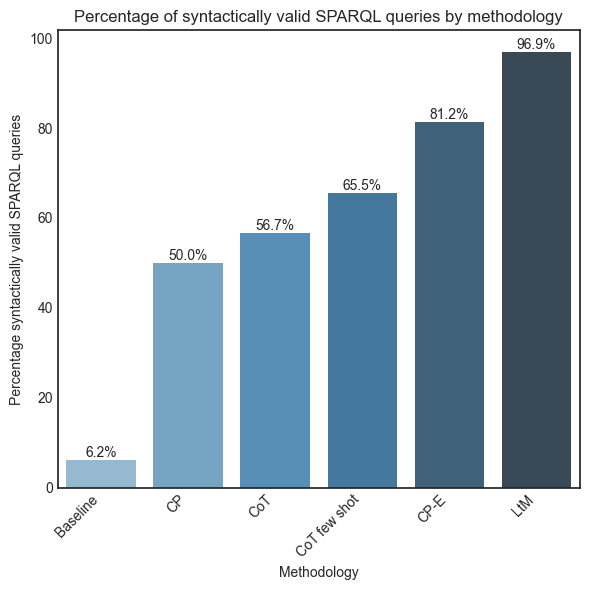

In [103]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
ax = sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")
plt.ylabel("Percentage syntactically valid SPARQL queries")
plt.title("Percentage of syntactically valid SPARQL queries by methodology")
plt.xlabel("Methodology")
plt.xticks(rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )
plt.tight_layout()
plt.savefig("syntactically_valid_percentage.png", dpi=300, bbox_inches='tight')
plt.show()

In [104]:
df_error = df[df["is_valid_sparql"] == True]

total_passed_queries_to_endpoint = (
    df_error
    .groupby("experiment_name")
    .size() 
    .reset_index(name="total_passed_queries_to_endpoint")
)

empty_result_counts = (
    df_error[df_error["error_occured_at_endpoint_message"] == "no error, but empty result"]
    .groupby("experiment_name")
    .size()
    .reset_index(name="empty_result_count")
)

summary = pd.merge(total_passed_queries_to_endpoint, empty_result_counts, on="experiment_name", how="left")
summary["empty_result_count"] = summary["empty_result_count"].fillna(0)
summary["percentage_empty_result"] = summary["empty_result_count"] / summary["total_passed_queries_to_endpoint"] * 100

summary.head(6)

,experiment_name,total_passed_queries_to_endpoint,empty_result_count,percentage_empty_result
0,Baseline,2,0.0,0.000000
1,CP,16,11.0,68.750000
2,CP-E,26,7.0,26.923077
3,CoT,17,16.0,94.117647
4,CoT few shot,19,10.0,52.631579
5,LtM,31,6.0,19.354839


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_45982/2445304150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


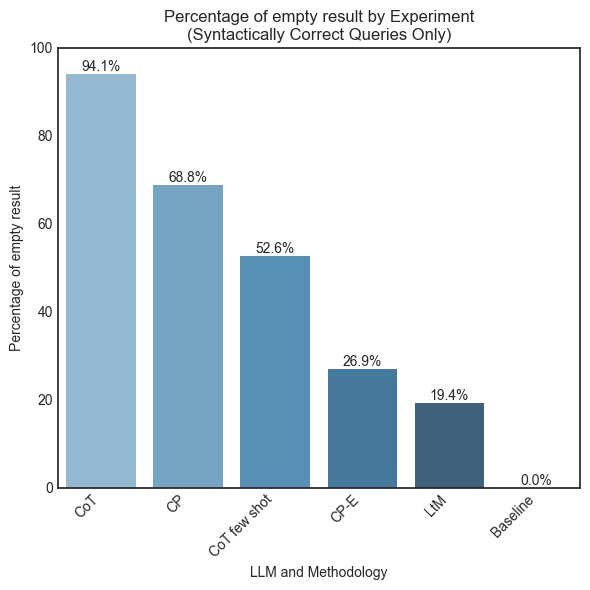

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
summary_sorted = summary.sort_values("percentage_empty_result", ascending=False)

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x="experiment_name",
    y="percentage_empty_result",
    data=summary_sorted,
    palette="Blues_d"
)
plt.ylabel('Percentage of empty result')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of empty result by Experiment\n(Syntactically Correct Queries Only)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.savefig("empty_result.png")
plt.show()

In [106]:
error_messages = (
    df
    .groupby("error_occured_at_endpoint_message")
    .size()
    .reset_index(name="count")
)
error_messages

,error_occured_at_endpoint_message,count
0,<urlopen error [Errno 8] nodename nor servname...,1
1,<urlopen error unknown url type: endpoint>,1
2,EndPointInternalError: The endpoint returned t...,2
3,"Expecting ',' delimiter: line 70940009 column ...",1
4,Expecting value: line 1 column 1 (char 0),1
5,Query timed out after 610 seconds (enforced by...,3
6,QueryBadFormed: A bad request has been sent to...,16
7,QueryBadFormed: A bad request has been sent to...,1
8,The read operation timed out,14
9,Unterminated string starting at: line 63116 co...,1


In [107]:
df_error = df[df["is_valid_sparql"] == True]

total_passed_queries_to_endpoint = (
    df_error
    .groupby("experiment_name")
    .size() 
    .reset_index(name="total_passed_queries_to_endpoint")
)

timeout_counts = (
    df_error[(df_error["error_occured_at_endpoint_message"] == "The read operation timed out") | 
             (df_error["error_occured_at_endpoint_message"].str.contains("Query timed out after"))]
    .groupby("experiment_name")
    .size()
    .reset_index(name="timeout_count")
)

timeout_percentages = (
    timeout_counts.merge(total_passed_queries_to_endpoint, on="experiment_name")
    .assign(timeout_percentage=lambda x: 100 * x.timeout_count / x.total_passed_queries_to_endpoint)
    .sort_values("timeout_percentage")
)

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_45982/752386450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


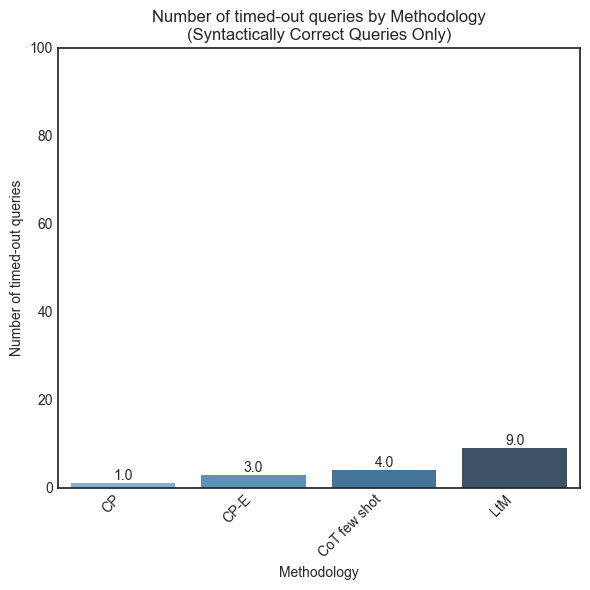

In [108]:

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x="experiment_name",
    y="timeout_count",
    data=timeout_counts,
    palette="Blues_d"
)
plt.ylabel('Number of timed-out queries')
plt.xlabel('Methodology')
plt.title('Number of timed-out queries by Methodology\n(Syntactically Correct Queries Only)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.savefig("timeout_counts.png")
plt.show()

In [109]:
valid_df = df[df["is_valid_sparql"] == True].copy()

error_messages = (
    valid_df
    .groupby("error_occured_at_endpoint_message")
    .size()
    .reset_index(name="count")
)
error_messages

,error_occured_at_endpoint_message,count
0,<urlopen error [Errno 8] nodename nor servname...,1
1,<urlopen error unknown url type: endpoint>,1
2,EndPointInternalError: The endpoint returned t...,2
3,"Expecting ',' delimiter: line 70940009 column ...",1
4,Expecting value: line 1 column 1 (char 0),1
5,Query timed out after 610 seconds (enforced by...,3
6,QueryBadFormed: A bad request has been sent to...,16
7,QueryBadFormed: A bad request has been sent to...,1
8,The read operation timed out,14
9,Unterminated string starting at: line 63116 co...,1


In [110]:
import pandas as pd
import numpy as np

# 1. Filter for valid SPARQL queries
valid_df = df[df["is_valid_sparql"] == True].copy()

# 2. Classify error messages
valid_df["error_type"] = "Error"  # Default classification

# Apply classifications
empty_result_mask = valid_df["error_occured_at_endpoint_message"] == "no error, but empty result"
timeout_mask = valid_df["error_occured_at_endpoint_message"].str.contains("The read operation timed out", na=False) | valid_df["error_occured_at_endpoint_message"].str.contains("Query timed out after", na=False)
no_error_mask = valid_df["error_occured_at_endpoint_message"] == "no error"

valid_df.loc[empty_result_mask, "error_type"] = "Empty Result"
valid_df.loc[timeout_mask, "error_type"] = "Timeout"
valid_df.loc[no_error_mask, "error_type"] = "No Error"

# 3. Group by experiment and error type to get counts
long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")

# 4. Get total valid queries per experiment
total_per_exp = valid_df.groupby("experiment_name").size().reset_index(name="total")

# 5. Merge to calculate percentages
long_df = pd.merge(long_df, total_per_exp, on="experiment_name")
long_df["percentage"] = (long_df["count"] / long_df["total"]) * 100

# 6. Get unique experiments and error types for plotting
experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

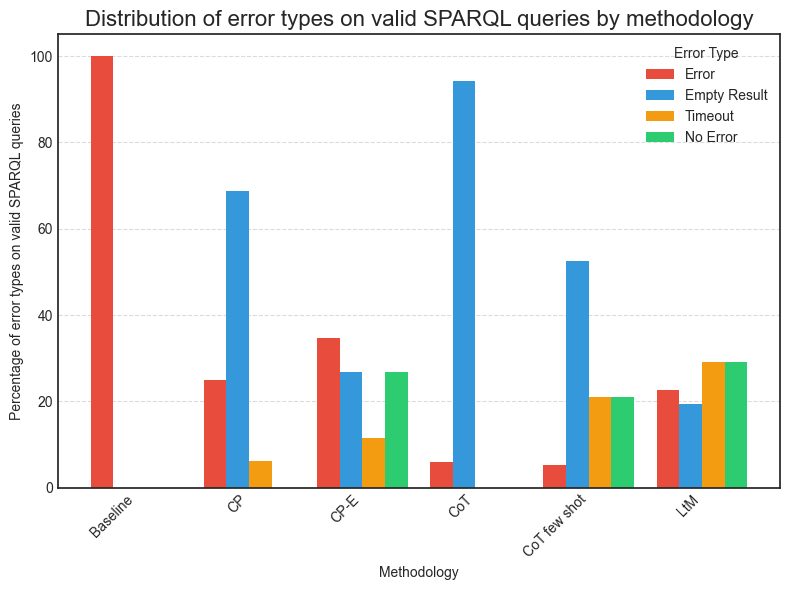

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")
total_per_exp = valid_df.groupby("experiment_name").size().reset_index(name="total")
long_df = pd.merge(long_df, total_per_exp, on="experiment_name")
long_df["percentage"] = (long_df["count"] / long_df["total"]) * 100

experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
index = np.arange(len(experiments))
colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']

for i, error_type in enumerate(error_types):
    error_data = long_df[long_df["error_type"] == error_type]
    error_dict = dict(zip(error_data["experiment_name"], error_data["percentage"]))
    percentages = [error_dict.get(exp, 0) for exp in experiments]
    ax.bar(index + i*bar_width, percentages, bar_width, label=error_type, color=colors[i % len(colors)])

ax.set_xlabel('Methodology')
ax.set_ylabel('Percentage of error types on valid SPARQL queries')
ax.set_title('Distribution of error types on valid SPARQL queries by methodology', fontsize=16)
ax.set_xticks(index + bar_width * (len(error_types) - 1) / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right')
ax.legend(title="Error Type")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("error_types_percentage.png", dpi=300, bbox_inches='tight')
plt.show()

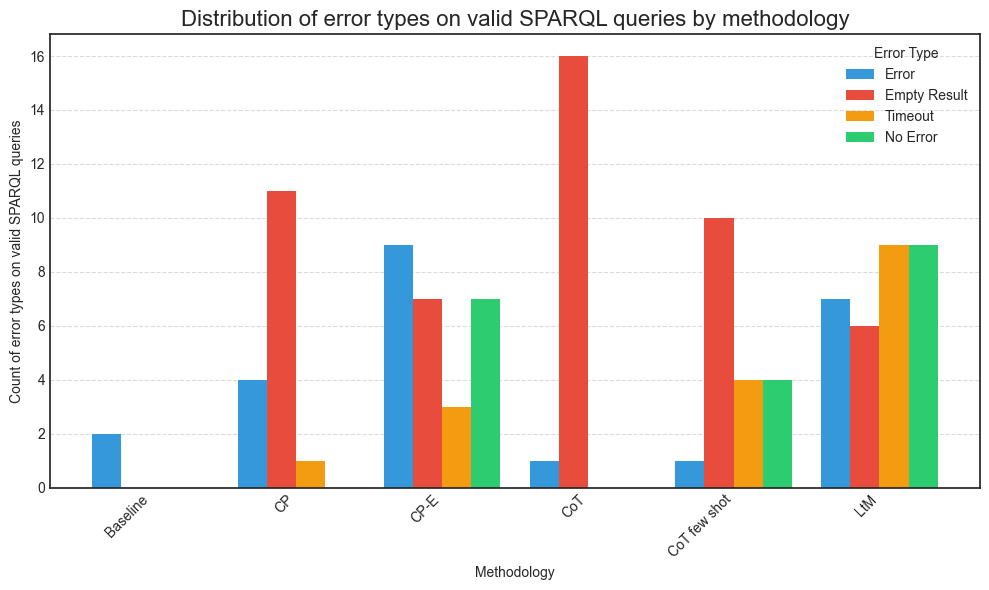

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the same valid_df with error_type classifications from before

# Group by experiment and error type to get counts (skip percentage calculation)
long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")

# Get unique experiments and error types
experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
bar_width = 0.2
index = np.arange(len(experiments))

# Colors for different error types
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

# Plot bars for each error type
for i, error_type in enumerate(error_types):
    error_data = long_df[long_df["error_type"] == error_type]
    
    # Create a dictionary mapping experiment to count
    error_dict = dict(zip(error_data["experiment_name"], error_data["count"]))
    
    # Get counts in the same order as experiments
    counts = [error_dict.get(exp, 0) for exp in experiments]
    
    # Plot the bars
    ax.bar(index + i*bar_width, counts, bar_width, 
           label=error_type, color=colors[i % len(colors)])

# Add labels, title and legend
ax.set_xlabel('Methodology')
ax.set_ylabel('Count of error types on valid SPARQL queries')
ax.set_title('Distribution of error types on valid SPARQL queries by methodology', fontsize=16)
ax.set_xticks(index + bar_width * (len(error_types) - 1) / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right')
ax.legend(title="Error Type")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a tight layout
plt.tight_layout()
plt.savefig("error_types_count.png", dpi=300, bbox_inches='tight')
plt.show()

In [116]:
import pandas as pd
import numpy as np
import json

def read_metrics_as_df(path):
    with open(path, "r") as f:
        data = json.load(f)
    if isinstance(data, dict):
        data = [data]
    return pd.DataFrame(data)

evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/metrics_dataset.json"
df_metrics_1 = read_metrics_as_df(evaluation_dataset_path_1)
df_metrics_1["experiment_name"] = "Baseline"
df_metrics_1["evaluation_timestamp"] = "ev_2025-05-08_18-12-10"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29/metrics_dataset.json"
df_metrics_2 = read_metrics_as_df(evaluation_dataset_path_2)
df_metrics_2["experiment_name"] = "CP"
df_metrics_2["evaluation_timestamp"] = "ev_2025-04-25_17-49-29"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-11_00-21-16/run_1/ev_2025-05-11_00-21-16/metrics_dataset.json"
df_metrics_3 = read_metrics_as_df(evaluation_dataset_path_3)
df_metrics_3["experiment_name"] = "CoT"
df_metrics_3["evaluation_timestamp"] = "ev_2025-05-11_00-21-16"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-04_00-51-30/run_2/ev_2025-05-04_01-51-29/metrics_dataset.json"
df_metrics_4 = read_metrics_as_df(evaluation_dataset_path_4)
df_metrics_4["experiment_name"] = "CoT few shot"
df_metrics_4["evaluation_timestamp"] = "ev_2025-05-04_01-51-29"

evaluation_dataset_path_5 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/run_2/ev_2025-05-02_02-09-02/metrics_dataset.json"
df_metrics_5 = read_metrics_as_df(evaluation_dataset_path_5)
df_metrics_5["experiment_name"] = "CP-E"
df_metrics_5["evaluation_timestamp"] = "ev_2025-05-02_02-09-02"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46/run_4/ev_2025-05-07_09-53-08/metrics_dataset.json"
df_metrics_6 = read_metrics_as_df(evaluation_dataset_path_6)
df_metrics_6["experiment_name"] = "LtM"
df_metrics_6["evaluation_timestamp"] = "ev_2025-05-07_09-53-08"


df_metrics = pd.concat([df_metrics_1, df_metrics_2, df_metrics_3, df_metrics_4, df_metrics_5, df_metrics_6])

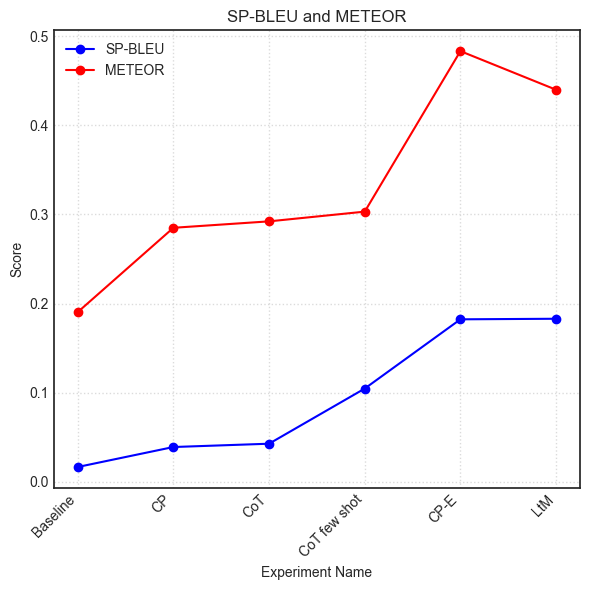

In [118]:
import matplotlib.pyplot as plt

x = df_metrics['experiment_name']

plt.figure(figsize=(6, 6))
plt.plot(x, df_metrics['SP-BLEU'], marker='o', color='blue', label='SP-BLEU')
plt.plot(x, df_metrics['METEOR'], marker='o', color='red', label='METEOR')

plt.xlabel('Experiment Name')
plt.ylabel('Score')
plt.title('SP-BLEU and METEOR')
plt.legend()
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7) 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

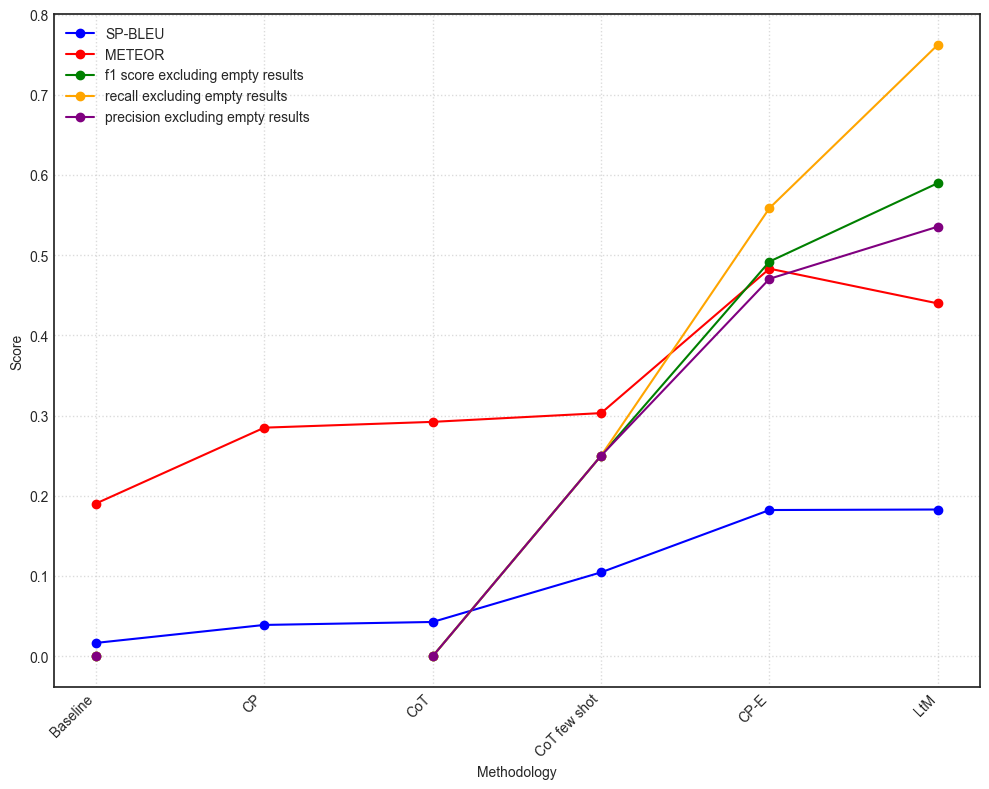

In [121]:
import matplotlib.pyplot as plt

x = df_metrics['experiment_name']

plt.figure(figsize=(10, 8))
plt.plot(x, df_metrics['SP-BLEU'], marker='o', color='blue', label='SP-BLEU')
plt.plot(x, df_metrics['METEOR'], marker='o', color='red', label='METEOR')
plt.plot(x, df_metrics['avg_result_excluding_empty_result_f1'], marker='o', color='green', label='f1 score excluding empty results')
plt.plot(x, df_metrics['avg_result_excluding_empty_result_recall'], marker='o', color='orange', label='recall excluding empty results')
plt.plot(x, df_metrics['avg_result_excluding_empty_result_precision'], marker='o', color='purple', label='precision excluding empty results')

plt.xlabel('Methodology')
plt.ylabel('Score')
plt.legend()
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7) 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()